
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W10/W10P4.ipynb)


In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import scipy

In [ ]:
def download_data():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Tedu_Time_Series/main/W10/TDG_data.csv"
  res = requests.get(url, allow_redirects=True)
  with open('TDG_data.csv','wb') as file:
    file.write(res.content)

download_data()

In [ ]:
ts = pd.read_csv("TDG_data.csv")

In [ ]:
ts_ = ts["open"]

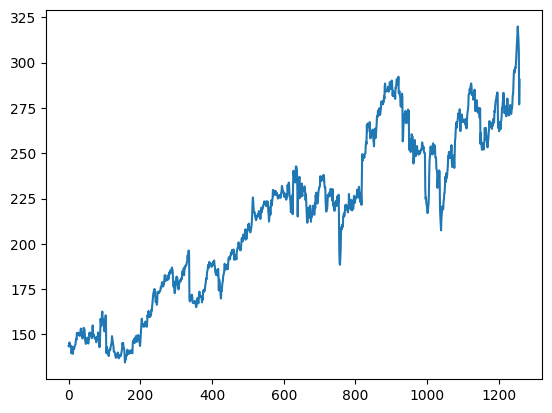

In [68]:
plt.plot(ts_)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(ts_)

(-0.9373329426721645,
 0.7754297347094223,
 12,
 1246,
 {'1%': -3.4356090875394525,
  '5%': -2.863862410805964,
  '10%': -2.568006480268158},
 6593.322998950073)

In [ ]:
ts_d = ts_.diff()[1:]

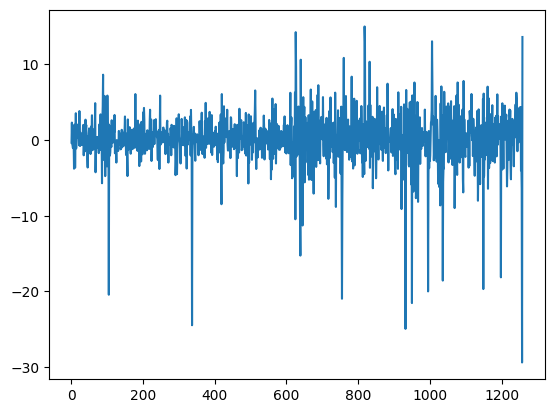

In [ ]:
plt.plot(ts_d)

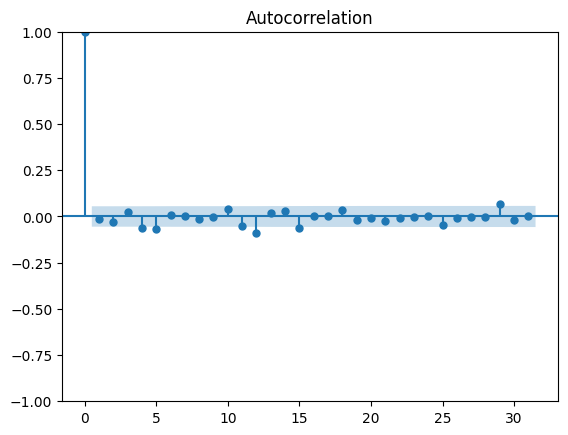

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_d);

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(ts_, order = (0,1,0))  ### we fit the mean equation
model_ = mod.fit()
model_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   open   No. Observations:                 1259
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3351.189
Date:                Mon, 06 May 2024   AIC                           6704.377
Time:                        16:59:00   BIC                           6709.514
Sample:                             0   HQIC                          6706.308
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        12.0604      0.169     71.543      0.000      11.730      12.391
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):             11917.87
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               3.10   Skew:                            -1.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

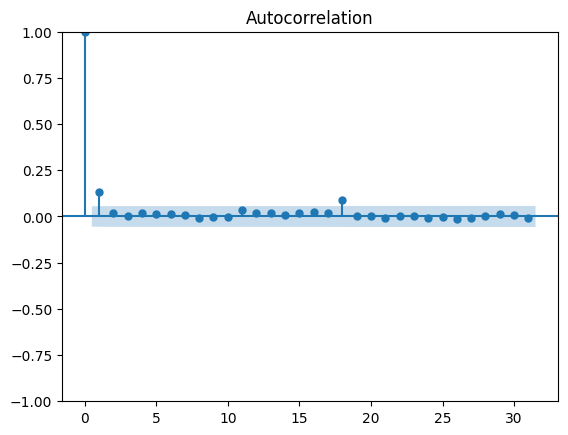

In [ ]:
plot_acf(model.resid[1:]**2);
sqr_res = model.resid[1:]**2

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(sqr_res, return_df = True, lags = 15) ### there is serieal correlation of the residuals therefore an ARCH effect is present.

,lb_stat,lb_pvalue
1,22.473367,0.000002
2,22.985499,0.000010
3,22.985997,0.000041
4,23.425703,0.000104
5,23.616918,0.000257
6,23.816840,0.000564
7,23.860074,0.001206
8,23.941643,0.002344
9,23.980043,0.004333
10,23.984862,0.007641


In [ ]:
statsmodels.stats.diagnostic.het_arch(sqr_res, nlags = 12)

(1.3168774000368522,
 0.9999354127706457,
 0.10870971928272052,
 0.9999374601113198)

In [ ]:
!pip install arch
import arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 6.0 MB/s eta 0:00:00


In [81]:
mod = arch.arch_model(ts_d, q = 1, p = 1, vol = "GARCH")  ### Fitting an GARCH(1,2) model here!
model = mod.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5086.407068750637
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3605.309131764207
Iteration:      3,   Func. Count:     19,   Neg. LLF: 3347.432435730527
Iteration:      4,   Func. Count:     26,   Neg. LLF: 3262.4931975702366
Iteration:      5,   Func. Count:     31,   Neg. LLF: 3288.05323391632
Iteration:      6,   Func. Count:     38,   Neg. LLF: 3327.4179900631934
Iteration:      7,   Func. Count:     45,   Neg. LLF: 3259.18966791897
Iteration:      8,   Func. Count:     50,   Neg. LLF: 3259.1573206605563
Iteration:      9,   Func. Count:     55,   Neg. LLF: 3259.1542873127155
Iteration:     10,   Func. Count:     60,   Neg. LLF: 3259.1537529733437
Iteration:     11,   Func. Count:     65,   Neg. LLF: 3259.1537295685284
Iteration:     12,   Func. Count:     70,   Neg. LLF: 3259.153725730388
Iteration:     13,   Func. Count:     74,   Neg. LLF: 3259.1537257307177
Optimization terminated successfully    (Exit mode 0)
     

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   open   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3259.15
Distribution:                  Normal   AIC:                           6526.31
Method:            Maximum Likelihood   BIC:                           6546.86
                                        No. Observations:                 1258
Date:                Mon, May 06 2024   Df Residuals:                     1257
Time:                        17:12:33   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2152      0.100      2.143  3.211e-02 [1.839e-02,  0.412]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.1121      2.028      1.042      0.298   [ -1.862,  6.086]
alpha[1]       0.3833      0.154      2.487  1.290e-02 [8.118e-02,  0.685]
beta[1]        0.5545      0.222      2.502  1.235e-02   [  0.120,  0.989]
==========================================================================

Covariance estimator: robust
"""

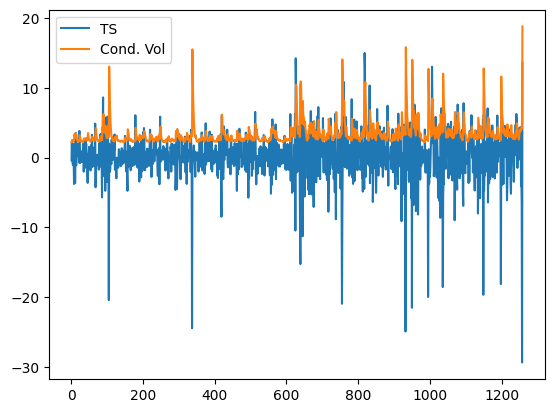

In [83]:
plt.plot(ts_d, label = "TS")
plt.plot(model.conditional_volatility, label = "Cond. Vol")
plt.legend()
plt.show()

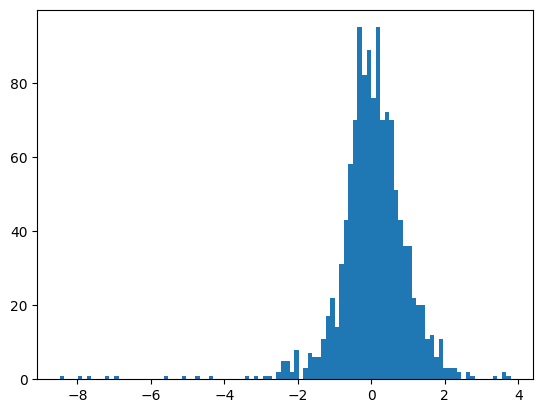

In [84]:
plt.hist(model_.resid/model.conditional_volatility, bins = 100);

In [85]:
acorr_ljungbox((model_.resid/model.conditional_volatility)[1:], return_df = True, lags = 15) ### there is serieal correlation of the residuals therefore an ARCH effect is present.

,lb_stat,lb_pvalue
1,0.052382,0.818969
2,0.849818,0.653829
3,2.685412,0.442712
4,5.615107,0.229795
5,8.025320,0.154846
6,8.182080,0.225065
7,8.371012,0.301018
8,8.576048,0.379311
9,8.881462,0.448288
10,10.304263,0.414217


Things to do

0.   Read the csv file. "pd.read_csv"
1.   See what kind of TS you are dealing with,
2.   Fit some ARMA model or maybe (ARIMA model in the case of unit root),
3.   Look at the residuals, see if  you fit the right model,
4.   Once you convince yourself, then make sure that there is an ARCH effect,
5.   Fit then an ARCH or GARCH model, to your data, determine the orders,
6.   Check the standardized residuals to see if you have fitted the right model.

